In [ ]:
pip install xgboost

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/CreditCard/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df['Class'].value_counts(normalize=True) * 100


,proportion
Class,
0,99.827251
1,0.172749


In [ ]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(
    x, y, test_size = 0.2, random_state = 42, stratify = y

)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


In [ ]:
y_train_res.value_counts()


,count
Class,
0,227451
1,227451


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [ ]:
y_pred_lr = lr.predict(x_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_lr))


Confusion Matrix:
[[56203   661]
 [    9    89]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962


ROC AUC Score:
0.9482695195410747


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_rf))

Confusion Matrix:
[[56847    17]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score:
0.9131158266626853


In [ ]:
importances = rf.feature_importances_
feature_names = x.columns

In [ ]:
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
feat_imp.head(10)

,Feature,Importance
14,V14,0.204698
4,V4,0.131808
10,V10,0.124215
12,V12,0.100231
17,V17,0.092633
3,V3,0.067684
16,V16,0.049810
11,V11,0.049062
2,V2,0.031259
9,V9,0.021049


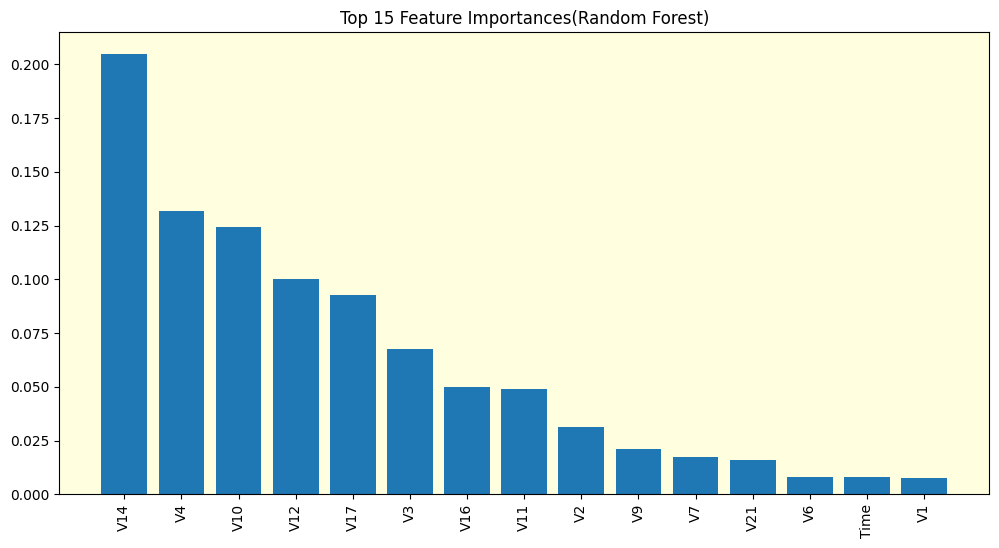

In [ ]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('lightyellow')
plt.bar(feat_imp['Feature'][:15], feat_imp['Importance'][:15])
plt.title('Top 15 Feature Importances(Random Forest)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
y_pred_proba = rf.predict_proba(x_test)[:, 1]


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

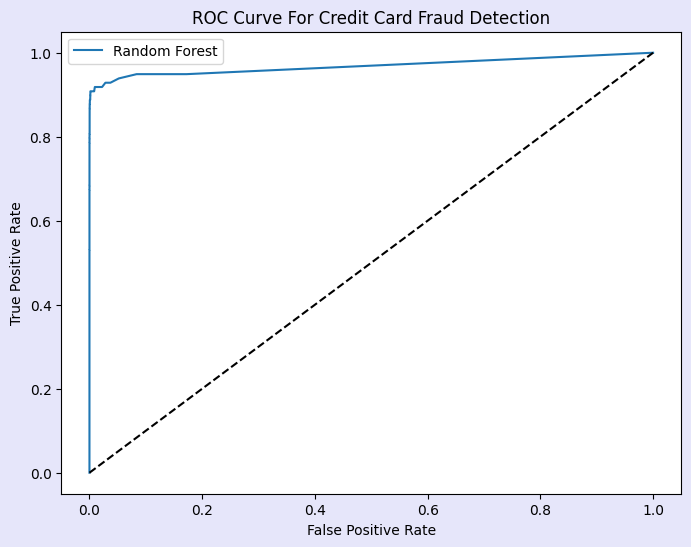

In [ ]:
plt.figure(figsize=(8, 6), facecolor = 'lavender')

plt.plot(fpr, tpr, label = 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Credit Card Fraud Detection')
plt.legend()
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9685285622408784


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(
    n_estimators = 300,
    learning_rate = 0.05,
    max_depth = 6,
    subsample = 0.9,
    colsample_bytree = 0.9,
    random_state = 42,
    objective = 'binary:logistic'
)


In [ ]:
xgb.fit(x_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(x_test)

In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb))

print('\nClassification Report:')
print(classification_report(y_test, y_pred_xgb))

print('\nROC AUC Score:')
print(roc_auc_score(y_test, y_pred_xgb))

Confusion Matrix:
[[56819    45]
 [   12    86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.66      0.88      0.75        98

    accuracy                           1.00     56962
   macro avg       0.83      0.94      0.88     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score:
0.9383798292811778


In [ ]:
model_comparison = pd.DataFrame({

    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Precison': [0.12, 0.83, 0.66],
    'Recall': [0.91, 0.83, 0.88],
    'F1-Score': [0.21, 0.83, 0.75],
    'ROC-AUC': [0.948, 0.913, 0.938],
    'Final Model': ['No', '✔ Yes', 'No'],

})


print("Model Performance comparison")
display(model_comparison.style.hide(axis="index"))

print("\n Final Selected Model: Random Forest")
print("Reason: Best precison(0.83), and best F1-score(0.83) offering the best balance between false positives and fraud detection accuracy.")


Model Performance comparison


Model,Precison,Recall,F1-Score,ROC-AUC,Final Model
Logistic Regression,0.120000,0.910000,0.210000,0.948000,No
Random Forest,0.830000,0.830000,0.830000,0.913000,✔ Yes
XGBoost,0.660000,0.880000,0.750000,0.938000,No



 Final Selected Model: Random Forest
Reason: Best precison(0.83), and best F1-score(0.83) offering the best balance between false positives and fraud detection accuracy.


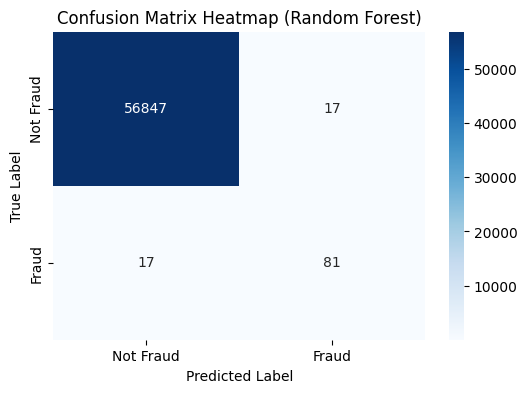

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot =True, fmt='d', cmap='Blues',
            xticklabels = ['Not Fraud', 'Fraud'],
            yticklabels = ['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix Heatmap (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()